### Counting words

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
text = "This is a random text. This is for testing purpose."

In [3]:
def count_words(text):
    word_counts = {}
    
    text = text.lower()
    skips = ["", ".", ",", ";", ":", "!", "?", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else:
            word_counts[word] = 1
    return word_counts
            
count_words(text)

{'this': 2,
 'is': 2,
 'a': 1,
 'random': 1,
 'text': 1,
 'for': 1,
 'testing': 1,
 'purpose': 1}

In [4]:
from collections import Counter

def count_words_fast(text):
    
    text = text.lower()
    skips = ["", ".", ",", ";", ":", "!", "?", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
        
    return Counter(text.split(" "))

count_words(text)

{'this': 2,
 'is': 2,
 'a': 1,
 'random': 1,
 'text': 1,
 'for': 1,
 'testing': 1,
 'purpose': 1}

In [5]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text.replace("\n", "").replace("\r", "")

    return text

In [6]:
ind = text.find("random text")
sample_text = text[ind : ind + 11]
sample_text

'random text'

In [7]:
def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [8]:
(num_unique, counts) = word_stats(count_words(text))
print(num_unique, sum(counts))

8 10


In [11]:
import os
book_dir = "./books"

stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author, title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

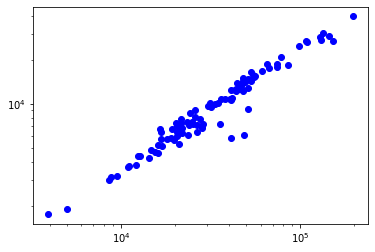

In [13]:
plt.loglog(stats.length, stats.unique, "bo");

Text(0, 0.5, 'Book length')

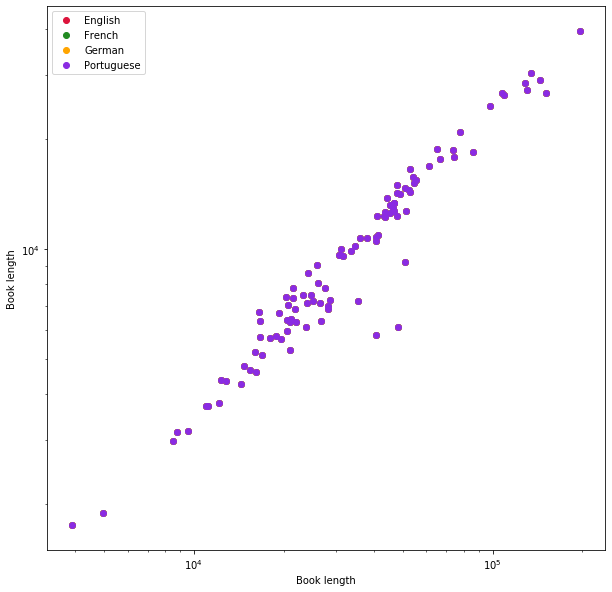

In [19]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(stats.length, stats.unique, "o", label = "English", color = "crimson");
subset = stats[stats.language == "French"]
plt.loglog(stats.length, stats.unique, "o", label = "French", color = "forestgreen");
subset = stats[stats.language == "German"]
plt.loglog(stats.length, stats.unique, "o", label = "German", color = "orange");
subset = stats[stats.language == "Portuguese"]
plt.loglog(stats.length, stats.unique, "o", label = "Portuguese", color = "blueviolet");
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Book length")